In [ ]:
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
data = load_iris().data
labels = load_iris().target

In [ ]:
labels = np.reshape(labels,(150,1))

In [ ]:
data = np.concatenate([data,labels], axis = -1)

In [ ]:
import pandas as pd

In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [ ]:
dataset = pd.DataFrame(data,columns = names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import matplotlib.pyplot as plt

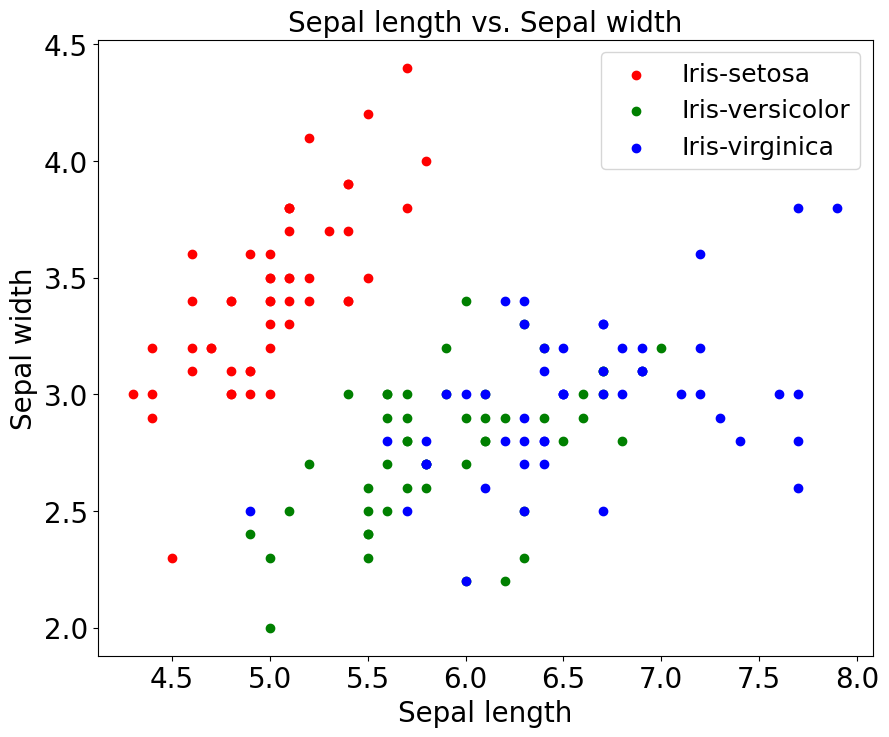

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

In [ ]:
dataset.iloc[:,2:].corr()

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


<ipython-input-26-8df3bcdd4885>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=ax)


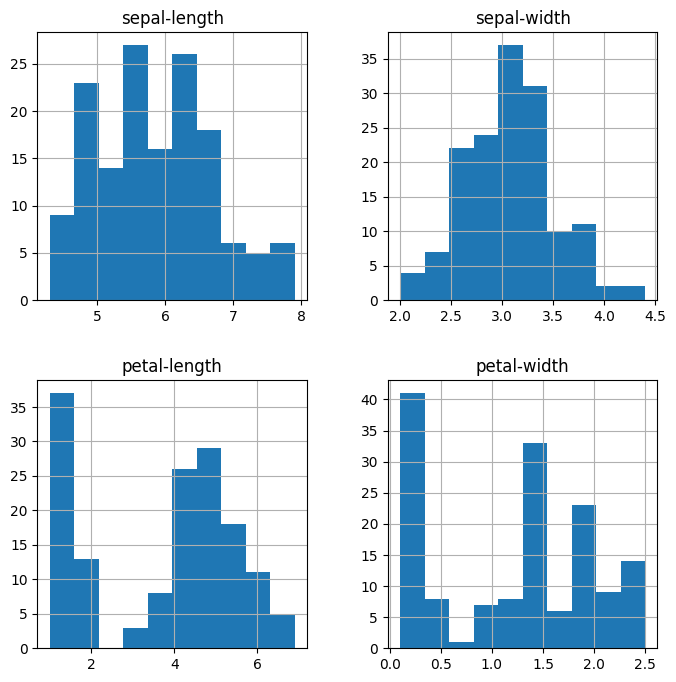

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

In [ ]:
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,4], test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))
print(neighbors)
print(train_accuracy)

[1 2 3 4 5 6 7 8]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)

  # Fit the model
  knn.fit(train_data,train_label)

  # Compute accuracy
  train_accuracy[i] = knn.score(train_data, train_label)
  test_accuracy[i] = knn.score(test_data, test_label)


In [ ]:
print(train_accuracy)

[1.         0.975      0.96666667 0.96666667 0.95833333 0.96666667
 0.975      0.95      ]


In [ ]:
print(test_accuracy)

[0.96666667 0.9        0.96666667 0.96666667 0.93333333 0.93333333
 0.93333333 0.96666667]


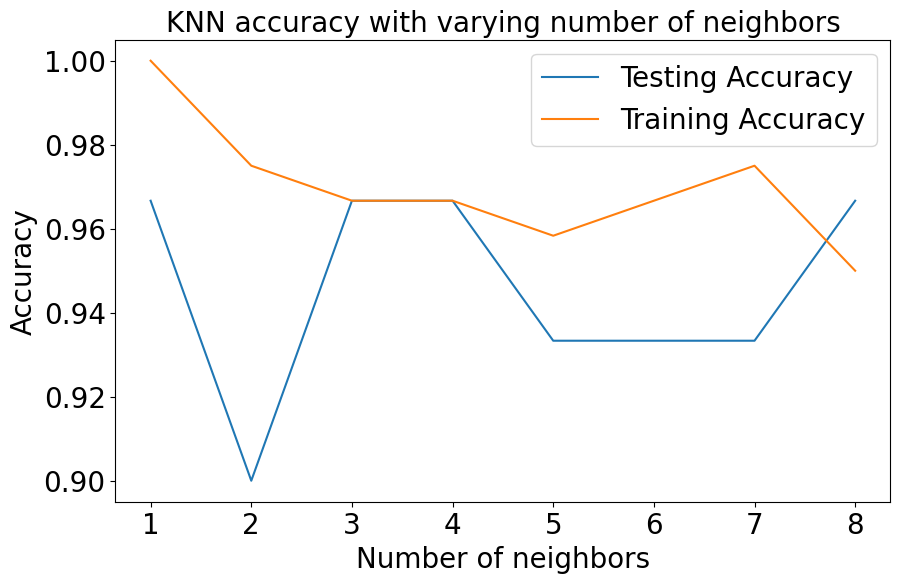

In [ ]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)


In [ ]:
print(test_accuracy)
print(train_accuracy)

0.9666666666666667
0.9666666666666667


In [ ]:
prediction = knn.predict(test_data)

Confusion matrix, without normalization
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.09 0.91]]


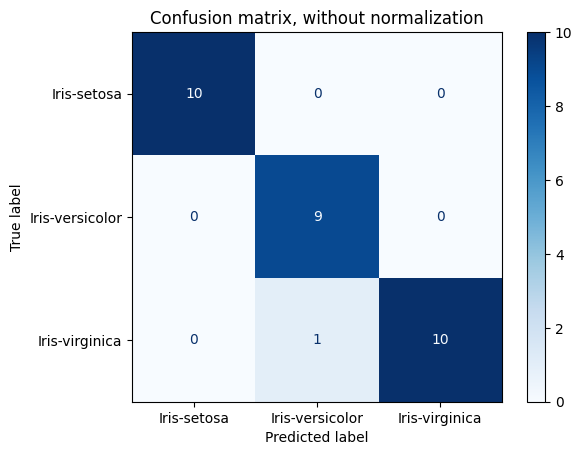

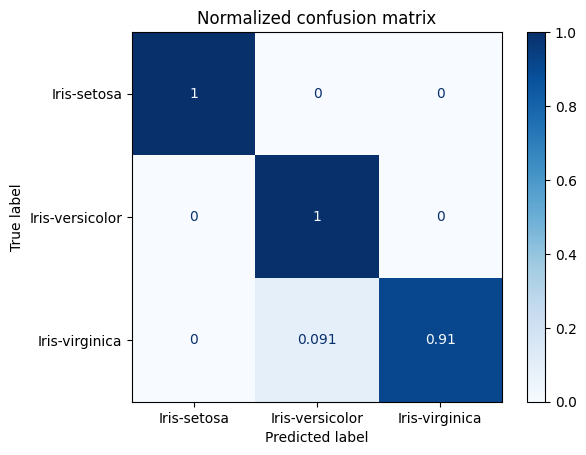

In [ ]:
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(train_data, train_label)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        test_data,
        test_label,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_label, prediction))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
import pandas as pd
import io

In [ ]:
string_ = """id,X,Y,Class
1,30,96,0
2,21,73,0
3,17,32,0
4,99,28,1
5,67,51,0
6,50,54,1
7,27,84,0
8,18,31,1
9,11,34,0
10,46,91,1
"""

In [ ]:
train_data = pd.read_csv(io.StringIO(string_),index_col='id')

In [ ]:
train_data

,X,Y,Class
id,,,
1,30,96,0
2,21,73,0
3,17,32,0
4,99,28,1
5,67,51,0
6,50,54,1
7,27,84,0
8,18,31,1
9,11,34,0


In [ ]:
X = pd.DataFrame(train_data.drop(['Class'],axis=1))

In [ ]:
y = pd.DataFrame(train_data['Class']).values.ravel()
y

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=3,p=1)
neighbors.fit(X,y)

KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
new_object = [54,68]

In [ ]:
neighbors.predict([new_object])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
neighbors.predict_proba([new_object])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.33, 0.67]])

In [ ]:
neighbors.kneighbors([new_object])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[18., 30., 31.]]), array([[5, 4, 9]]))